###Context###

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

###Content###

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#####Pregnancies: Number of times pregnant
######Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
######BloodPressure: Diastolic blood pressure (mm Hg)
######SkinThickness: Triceps skin fold thickness (mm)
######Insulin: 2-Hour serum insulin (mu U/ml)
######BMI: Body mass index (weight in kg/(height in m)^2)
######DiabetesPedigreeFunction: Diabetes pedigree function
######Age: Age (years)
######Outcome: Class variable (0 or 1)

#Import Libraries#

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color=sns.color_palette()
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

#Load the Data#

In [2]:
# Load the data
data = pd.read_csv('/content/diabetes.csv')

#Data Description#

In [ ]:
# Top 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Last 5 rows
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# Describe the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Total number of rows and columns within the dataset
data.shape

(768, 9)

In [ ]:
# Data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Data Cleaning#

##Checking the Missing values##

In [ ]:
# Finding column wise missing values 
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#Exploratory data Analysis#

In [ ]:
# Columns in a dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

####Univariate Analysis####

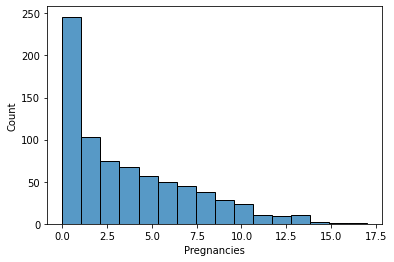

In [ ]:
sns.histplot(data['Pregnancies'])

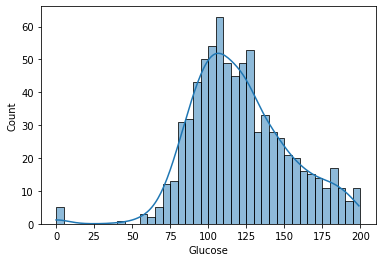

In [ ]:
sns.histplot(data['Glucose'],binwidth=5,kde=True)

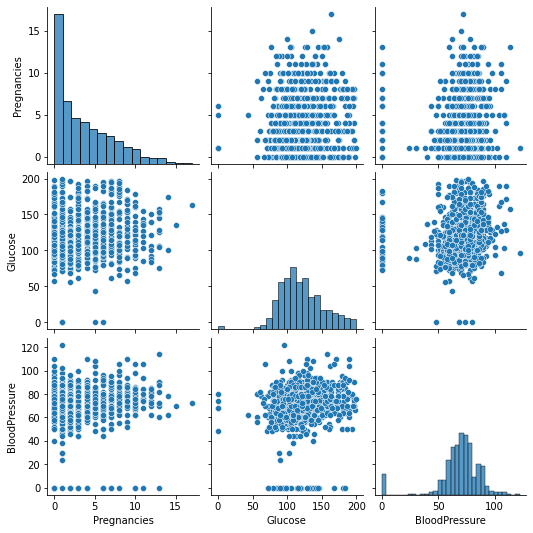

In [ ]:
sns.pairplot(data=data,vars=['Pregnancies', 'Glucose', 'BloodPressure'])

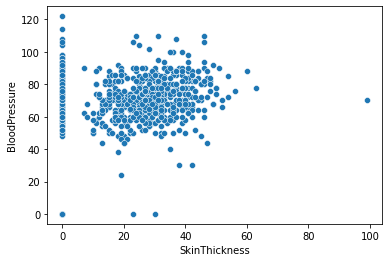

In [ ]:
sns.scatterplot(x=data['SkinThickness'],y=data['BloodPressure'])

In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

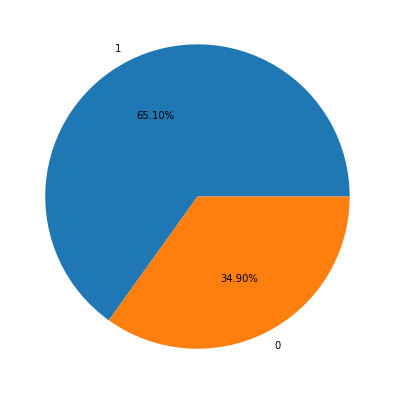

In [ ]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data['Outcome'].value_counts(), labels = data.Outcome.unique(),autopct='%1.2f%%')
 
# show plot
plt.show()

####Bi-variate Analysis####

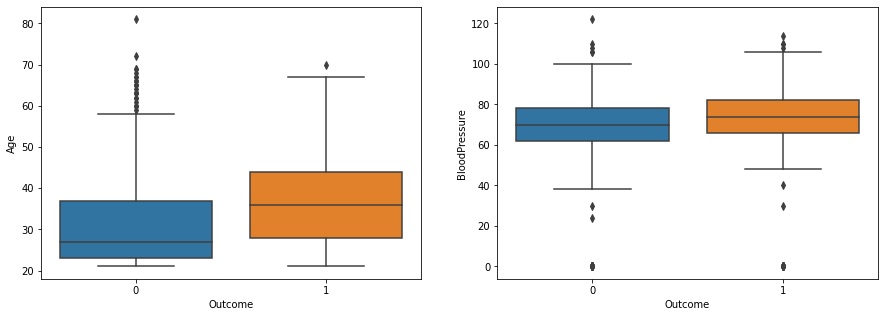

In [3]:
#Relationship between dependant and independant variables using boxplot 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data['Outcome'],data['Age'])

plt.subplot(1,2,2)
sns.boxplot(data['Outcome'],data['BloodPressure'])
plt.show()

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

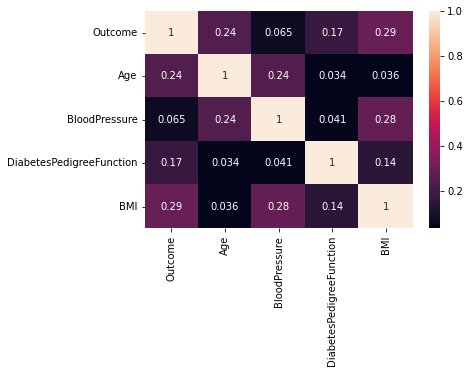

In [6]:
# Heatmap showing relationship between different features.
sns.heatmap(data[['Outcome','Age','BloodPressure','DiabetesPedigreeFunction','BMI']].corr(),annot=True)

##Outlier Treatment##

In [ ]:
def plot_boxplot(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

####Column Pregnancies###

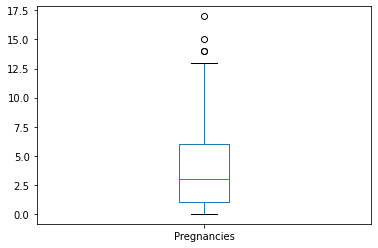

In [ ]:
#Column Pregnancies
plot_boxplot(data,'Pregnancies')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


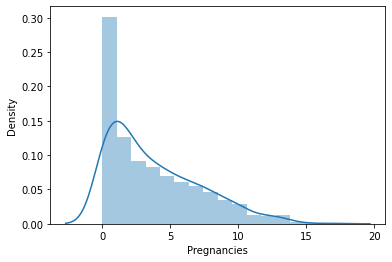

In [ ]:
sns.distplot(data['Pregnancies'])

In [ ]:
data.Pregnancies.describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [ ]:
IQR=data.Pregnancies.quantile(0.75)-data.Pregnancies.quantile(0.25)

In [ ]:
lower_bridge=data['Pregnancies'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Pregnancies'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-6.5
13.5


(None, None)

In [ ]:
#### Extreme outliers
lower_bridge=data['Pregnancies'].quantile(0.25)-(IQR*3)
upper_bridge=data['Pregnancies'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-14.0
21.0


(None, None)

In [ ]:
data.loc[data['Pregnancies']>=13,'Pregnancies']=13

In [ ]:
data.Pregnancies.describe()

count    768.000000
mean       3.834635
std        3.336808
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       13.000000
Name: Pregnancies, dtype: float64

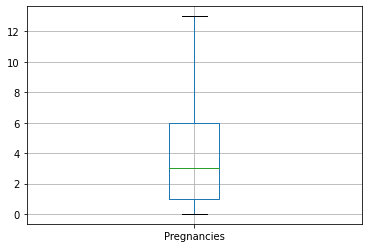

In [ ]:
data.boxplot(column='Pregnancies')

###Column Glucose###

In [ ]:
data.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


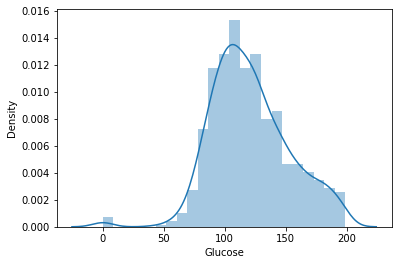

In [ ]:
sns.distplot(data['Glucose'])

In [ ]:
IQR=data.Glucose.quantile(0.75)-data.Glucose.quantile(0.25)

In [ ]:
lower_bridge=data['Glucose'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Glucose'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

37.125
202.125


(None, None)

In [ ]:
data.loc[data['Glucose']<=37,'Glucose']=37

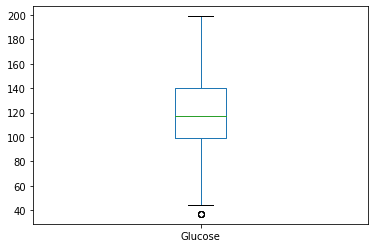

In [ ]:
data.Glucose.plot.box()

###Blood Pressure###

In [ ]:
data.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


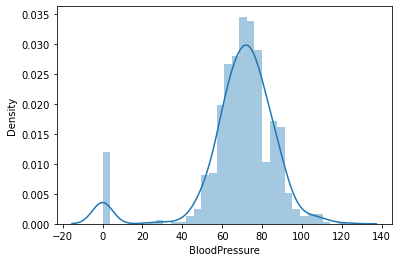

In [ ]:
sns.distplot(data['BloodPressure'])

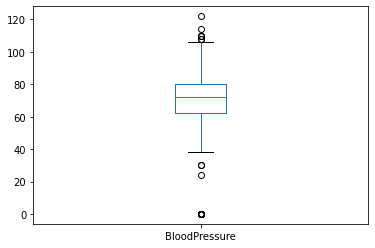

In [ ]:
data.BloodPressure.plot.box()

In [ ]:
uppper_boundary=data['BloodPressure'].mean() + 3* data['BloodPressure'].std()
lower_boundary=data['BloodPressure'].mean() - 3* data['BloodPressure'].std()
print(lower_boundary), print(uppper_boundary),print(data['BloodPressure'].mean())

11.038047238065673
127.17289026193433
69.10546875


(None, None, None)

In [ ]:
data.loc[data['BloodPressure']<=11,'BloodPressure']=11

In [ ]:
data.BloodPressure.describe()

count    768.000000
mean      69.606771
std       17.622185
min       11.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

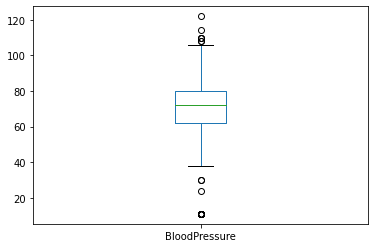

In [ ]:
data.BloodPressure.plot.box()

In [ ]:
IQR=data.BloodPressure.quantile(0.75)-data.BloodPressure.quantile(0.25)

In [ ]:
lower_bridge=data['BloodPressure'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['BloodPressure'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

35.0
107.0


(None, None)

In [ ]:
data.loc[data['BloodPressure']<=35,'BloodPressure']=35
data.loc[data['BloodPressure']> 107,'BloodPressure']=107

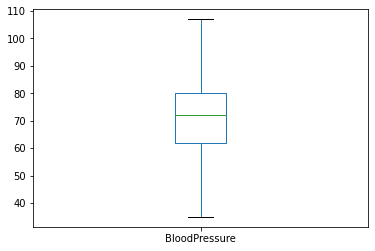

In [ ]:
data.BloodPressure.plot.box()

###Column SkinThickness###

In [ ]:
data.SkinThickness.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

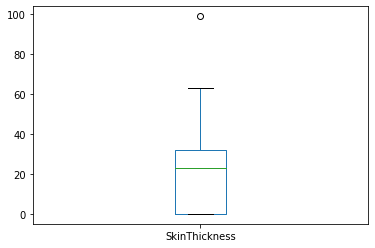

In [ ]:
data.SkinThickness.plot.box()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


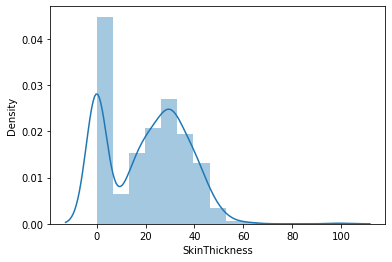

In [ ]:
sns.distplot(data['SkinThickness'])

In [ ]:
IQR=data.SkinThickness.quantile(0.75)-data.SkinThickness.quantile(0.25)

In [ ]:
lower_bridge=data['SkinThickness'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['SkinThickness'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-48.0
80.0


(None, None)

In [ ]:
data.loc[data['SkinThickness']> 80,'SkinThickness']=80

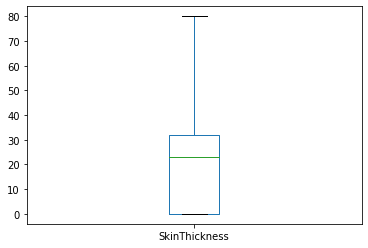

In [ ]:
data.SkinThickness.plot.box()

###Column Insulin###

In [ ]:
data.Insulin.describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

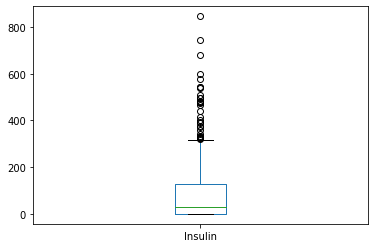

In [ ]:
data.Insulin.plot.box()

In [ ]:
IQR=data.Insulin.quantile(0.75)-data.Insulin.quantile(0.25)

In [ ]:
lower_bridge=data['Insulin'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Insulin'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-190.875
318.125


(None, None)

In [ ]:
data.loc[data['Insulin']> 318,'Insulin']=318

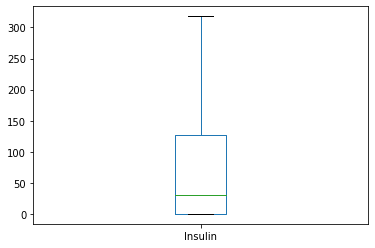

In [ ]:
data.Insulin.plot.box()

###Column BMI###

In [ ]:
data.BMI.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

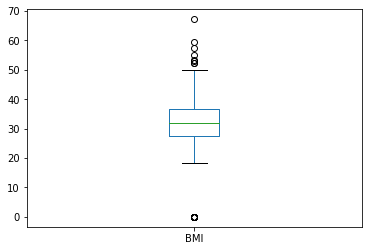

In [ ]:
data.BMI.plot.box()

In [ ]:
IQR=data.BMI.quantile(0.75)-data.BMI.quantile(0.25)

In [ ]:
lower_bridge=data['BMI'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['BMI'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

13.35
50.550000000000004


(None, None)

In [ ]:
data.loc[data['BMI']<= 13,'BMI']=13
data.loc[data['BMI']> 50,'BMI']=50

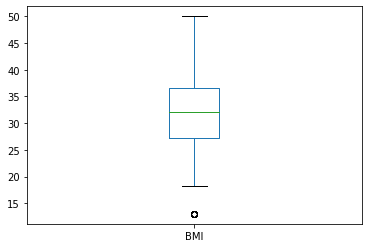

In [ ]:
data.BMI.plot.box()

###Column DiabetesPedigreeFunction###

In [ ]:
data.DiabetesPedigreeFunction.describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

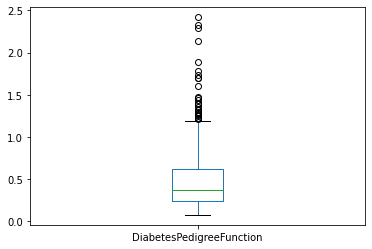

In [ ]:
data.DiabetesPedigreeFunction.plot.box()

In [ ]:
IQR=data.DiabetesPedigreeFunction.quantile(0.75)-data.DiabetesPedigreeFunction.quantile(0.25)

In [ ]:
lower_bridge=data['DiabetesPedigreeFunction'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['DiabetesPedigreeFunction'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-0.32999999999999996
1.2


(None, None)

In [ ]:
data.loc[data['DiabetesPedigreeFunction']> 1.2,'DiabetesPedigreeFunction']=1.2

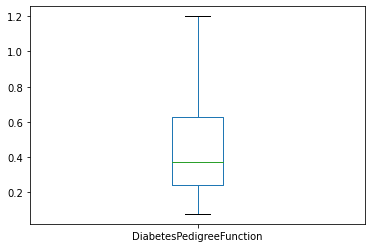

In [ ]:
data.DiabetesPedigreeFunction.plot.box()

###Column Age###

In [ ]:
data.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

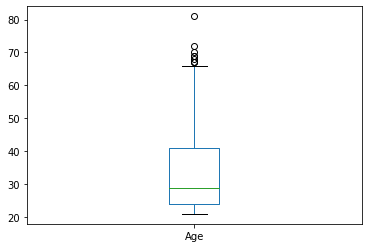

In [ ]:
data.Age.plot.box()

In [ ]:
IQR=data.Age.quantile(0.75)-data.Age.quantile(0.25)

In [ ]:
lower_bridge=data['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-1.5
66.5


(None, None)

In [ ]:
data.loc[data['Age']> 66,'Age']=66

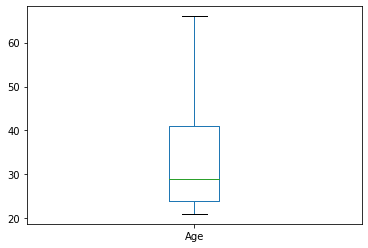

In [ ]:
data.Age.plot.box()

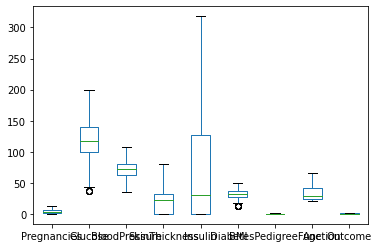

In [ ]:
data.plot.box()

###Applying Logistics regression Algorithm###

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(537, 8)
(231, 8)


In [ ]:
print(y_train.value_counts(normalize=True).round(2))
print(' ')
print(y_test.value_counts(normalize=True).round(2))

0    0.65
1    0.35
Name: Outcome, dtype: float64
 
0    0.65
1    0.35
Name: Outcome, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# find model accuracy using Confusion matrix
confusion_matrix(y_test,y_pred)

array([[133,  17],
       [ 43,  38]])

In [ ]:
(133+38)/(133+38+17+43)

0.7402597402597403